# Preparing data
In this notebook we prepare data set for modeling. We removed unnecessary columns, refactor columns in bad format and drop rows with empty values.

List of columns:\
id - Removed (Has only unique values)\
listing_url - Removed (Has only unique values)\
scrape_id - Removed (Has only one unique value)\
last_scraped - Removed (Has only one unique value)\
source - Removed (No added value for modeling)\
name - Removed (No added value for modeling)\
description - Removed (Only NaN values)\
neighborhood_overview - Removed (47 % null values)\
picture_url - Removed (Has only unique values)\
host_id - Removed (Price can not be predicted from id)\
host_url - Removed (Each host_url corresponds to a unique host_id)\
host_name - Remove (Price can not be predicted from host name)\
host_since - Converted to datetime\
host_location - Removed (Too wide categorical value)\
host_about - Removed (42 % null values)\
host_response_time - Changed data type to category\
host_response_rate - Changed percentage to 0-1 scale\
host_acceptance_rate Changed percentage to 0-1 scale\
host_is_superhost - Changed to bool\
host_thumbnail_url - Removed (Column contain url)\
host_picture_url - Removed (Column contain url)\
host_neighbourhood - Removed (We used other column with location)\
host_listings_count - No changes\
host_total_listings_count - Removed (Corellated with host_listings_count)\
host_verifications - Chaged verification methods to count of verification methods\
host_has_profile_pic - Changed to bool\
host_identity_verified - Changed to bool\
neighbourhood - Removed (We used other column with location)\
neighbourhood_cleansed - Rename Prague parts to district names.\
neighbourhood_group_cleansed - Removed (Only null values)\
latitude  - No changes\
longitude - No changes\
property_type - Removed (We used other columns with type of space)\
room_type - Change to category type\
accommodates - No changes\
bathrooms - Removed (Only null values)\
bathrooms_text - Convert text description to count of bathrooms (float)\
bedrooms - Removed (Only null values)\
beds - No changes\
amenities - Removed (Has only one unique value)\
price - Remove dollar character and convert to float\
minimum_nights - No changes\
maximum_nights - No changes\
minimum_minimum_nights - Removed (We used other column with this values)\
maximum_minimum_nights - Removed (We used other column with this values)\
minimum_maximum_nights - Removed (We used other column with this values)\
maximum_maximum_nights - Removed (We used other column with this values)\
minimum_nights_avg_ntm - Removed (We used other column with this values)\
maximum_nights_avg_ntm - Removed (We used other column with this values)\
calendar_updated - Removed (Only null values)\
has_availability - Changed to bool\
availability_30\
availability_60\
availability_90\
availability_365\
calendar_last_scraped - Removed (Has only one unique value)\
number_of_reviews - no changes\
number_of_reviews_ltm - Removed (We used other column with number of review)\
number_of_reviews_l30d - Removed (We used other column with number of review)\
first_review - Removed (No added value for modeling)\
last_review - Removed (No added value for modeling)\
review_scores_rating\
review_scores_accuracy\
review_scores_cleanliness\
review_scores_checkin\
review_scores_communication\
review_scores_location\
review_scores_value\
license - Removed (Only null values)\
instant_bookable - Changed to bool\
calculated_host_listings_count\
calculated_host_listings_count_entire_homes\
calculated_host_listings_count_private_rooms\
calculated_host_listings_count_shared_rooms\
reviews_per_month


In [461]:
#Import packages and set jupyter
import pandas as pd
import ast
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import json
from collections import Counter
import ast

In [462]:
#pd.reset_option('display.max_columns')
#pd.reset_option("display.max_rows")
#pd.set_option('display.max_columns', None)
#pd.set_option("display.max_rows", None)

In [463]:
#Load raw data and prepare dataframe
path_to_data = "../../data/raw/listings.csv.gz"

listings_data = pd.read_csv(path_to_data)

df = listings_data.copy()

In [464]:
#REMOVE
#df.head(3)

In [465]:
#data summary
df.describe(include='all')

#number of rows
rows=df.shape[0]
columns = df.shape[1]

print(f'Rows: {rows}, Columns: {columns}')

Rows: 8366, Columns: 75


In [466]:
#Define list with columns for removing
delete_cols=[]

In [467]:
#unique values
for column in df:
    print (f"{column}: {df[column].nunique()} unique values")

#columns with only unique values
unique_columns = []
for column in df.columns:
    if df[column].nunique() == len(df):
        unique_columns.append(column)

print(unique_columns)

# -> all rows are unique
# -> delete listing_url, picture_url

del1 = "id","listing_url","picture_url"

delete_cols.extend(del1)



id: 8366 unique values
listing_url: 8366 unique values
scrape_id: 1 unique values
last_scraped: 2 unique values
source: 2 unique values
name: 7978 unique values
description: 6530 unique values
neighborhood_overview: 2791 unique values
picture_url: 8055 unique values
host_id: 2728 unique values
host_url: 2728 unique values
host_name: 1244 unique values
host_since: 1970 unique values
host_location: 164 unique values
host_about: 1280 unique values
host_response_time: 4 unique values
host_response_rate: 47 unique values
host_acceptance_rate: 93 unique values
host_is_superhost: 2 unique values
host_thumbnail_url: 2620 unique values
host_picture_url: 2620 unique values
host_neighbourhood: 124 unique values
host_listings_count: 68 unique values
host_total_listings_count: 87 unique values
host_verifications: 5 unique values
host_has_profile_pic: 2 unique values
host_identity_verified: 2 unique values
neighbourhood: 220 unique values
neighbourhood_cleansed: 51 unique values
neighbourhood_group_

In [468]:
# amenities

# Parse JSON column into a Python list of dictionaries
#df['amenities'] = df['amenities'].apply(json.loads)

## dál už háže error, že je stejně empty
def parse_amenities(amenities_str):
    try:
        return ast.literal_eval(amenities_str)
    except ValueError:
        return []  


df['amenities_list'] = df['amenities'].apply(parse_amenities)
all_amenities = Counter([item for sublist in df['amenities_list'] for item in sublist])


amenities_count_df = pd.DataFrame(all_amenities.items(), columns=['Amenity', 'Count'])
def count_amenities(amenities_str):
    try:
        # Převede string na seznam
        amenities_list = ast.literal_eval(amenities_str)
        # Vrací počet prvků v seznamu
        return len(amenities_list)
    except:
        # V případě jakékoliv chyby vrací 0
        return 0


df['amenities_count'] = df['amenities'].apply(count_amenities)


print(df[['amenities', 'amenities_count']])
print(amenities_count_df)

#delete_cols.append("amenities") - it makes problems later on so dropping immediately:

df.drop("amenities", axis=1, inplace=True)

                                              amenities  amenities_count
0     ["Hair dryer", "Carbon monoxide alarm", "Dedic...               30
1     ["Hair dryer", "Carbon monoxide alarm", "Dedic...               28
2     ["Hair dryer", "Free washer \u2013 In unit", "...               58
3     ["Hair dryer", "Carbon monoxide alarm", "Shamp...               27
4     ["Hair dryer", "Carbon monoxide alarm", "Dedic...               32
...                                                 ...              ...
8361  ["Hair dryer", "Shampoo", "Dining table", "Ref...               22
8362  ["Hair dryer", "Carbon monoxide alarm", "Host ...               28
8363  ["Hair dryer", "Dedicated workspace", "Shampoo...               64
8364  ["Security cameras on property", "Wifi", "Smok...                4
8365  ["Hair dryer", "Dedicated workspace", "Shampoo...               30

[8366 rows x 2 columns]
                                                Amenity  Count
0                                   

In [469]:
df.dtypes
#find columns with only one variable
single_variable_columns = []
for column in df.columns:
    # Check if the column contains lists
    if df[column].apply(lambda x: isinstance(x, list)).any():
        # If it contains lists, skip it
        continue
    
    # Check if the column has only one unique value
    if df[column].nunique() == 1:
        single_variable_columns.append(column)

print(single_variable_columns)

# -> delete scrape_id, last_scraped,amenities, calendar_last_scraped

delete_cols.extend(single_variable_columns)

['scrape_id']


In [470]:
source_uv = df["source"].unique()

# Print all unique values
print("Unique values in column '{}':".format("source"))
for value in source_uv:
    print(value)

#delete source
delete_cols.append("source")


Unique values in column 'source':
city scrape
previous scrape


In [471]:
print(df["name"].value_counts())
#delete name
delete_cols.append("name")

name
Hostel HOMEr - 12 bed mixed room                      24
City centre room in shared apartment                  17
Hostel HOMEr - 15 bed mixed room                      15
Apartment Prague                                      14
Private room in the heart of Prague                   14
                                                      ..
Modern, spacious apartment in hip neighborhood         1
Apartment for 6 persons close to downtown              1
A&S Industrial lofts – West unit                       1
Loft Palmovka                                          1
Modern spacious apartment next to Wenceslas Square     1
Name: count, Length: 7978, dtype: int64


In [472]:
# columns with only NaN values
df.isnull().sum()

na_columns = []
for column in df.columns:
    if df[column].isnull().all():
        na_columns.append(column)

print(na_columns)

df.columns
# -> delete description, neighbourhood_group_cleansed, bathrooms, bedrooms, calendar_updated, license  
delete_cols.extend(na_columns) 

['neighbourhood_group_cleansed', 'calendar_updated', 'license']


In [473]:
# neighborhood_overview

neighborhood_uv = df["neighborhood_overview"].nunique()

print(neighborhood_uv)
print(df["neighborhood_overview"].dtype)

print((df["neighborhood_overview"].isnull().sum())/rows)

# 47% are nulls -> delete

delete_cols.append("neighborhood_overview")



2791
object
0.46402103753287116


In [474]:
#host_id

df["host_id"].value_counts()

#host_url

unique_combinations = df.groupby(['host_url', 'host_id']).size().reset_index(name='count')
duplicates = unique_combinations[unique_combinations.duplicated(subset=['host_url'], keep=False)]

if duplicates.empty:
    print("Each host_url corresponds to a unique host_id.")
else:
    print("Some host_url values correspond to multiple host_id values.")

# -> delete host_url, host_id  

delete_cols.extend(["host_url","host_id"])

Each host_url corresponds to a unique host_id.


In [475]:
#host_name

unique_combinations = df.groupby(['host_name', 'host_id']).size().reset_index(name='count')
duplicates = unique_combinations[unique_combinations.duplicated(subset=['host_name'], keep=False)]

if duplicates.empty:
    print("Each host_name corresponds to a unique host_id.")
else:
    print("Some host_names values correspond to multiple host_id values.")

# -> delete host_name   
delete_cols.append("host_name") 

Some host_names values correspond to multiple host_id values.


In [476]:
#host_since
df["host_since"].value_counts()

# Convert "host_since" column to datetime format
df["host_since"] = pd.to_datetime(df["host_since"])

#extract year 
df["host_since"] = df["host_since"].dt.year

print(df["host_since"].value_counts())


host_since
2016    1107
2015    1006
2023     843
2022     705
2013     629
2014     624
2012     594
2018     593
2019     563
2017     531
2011     354
2021     276
2020     235
2010     116
2024     115
2008      70
2009       5
Name: count, dtype: int64


In [477]:
#host_location

print(df["host_location"].value_counts())

# -> delete host_location
delete_cols.append("host_location") 

host_location
Prague, Czechia                     5779
Czechia                              186
Hlavní město Praha, Czechia          125
Central Bohemian Region, Czechia      26
Hradec Kralove, Czechia               24
                                    ... 
United States                          1
Sedlec-Prčice, Czechia                 1
Pardubice Region, Czechia              1
Westerburg, Germany                    1
Tel Aviv-Yafo, Israel                  1
Name: count, Length: 164, dtype: int64


In [478]:
#host about

host_abt_uv = df["host_about"].unique()

#Print all unique values
print("Unique values in column '{}':".format("host_about"))
for value in host_abt_uv:
    print(value)

(df["host_about"].isnull().sum())/rows

# 42% are nulls-> delete

delete_cols.append("host_about")

Unique values in column 'host_about':
Hello, 
glad to see that you are interested in our beautiful city, Prague!

My name is Klara, I’m 25 years old and I live in Prague - magical Central European city. I love nature and great food (preferably Asian and Italian cuisine). I have recently fallen for jogging – it boosts me with energy and perfectly prepares for a new day. I also love adrenaline experiences in general - camping, all kinds of sports (skiing, squash or badminton) or even rafting.

I work with a group of young enthusiastic people (mostly students) and together we are renting a number of apartments in the centre of Prague here on Airbnb. I have a lot of experience with tourism, since I work in hospitality industry for a fifth year now. That’s why I can recommend a lot of great and interesting cafés, restaurants and secret places only the locals know. It's my passion (and also the passion of my team) to get to know new people, new cultures and experience something interesting e

In [479]:
#host_response_time

df["host_response_time"].value_counts()

# Define the categories for host response time
categories = ['within an hour', 'within a few hours', 'within a day', 'a few days or more']

# Convert the "host_response_time" column to categorical data type
df["host_response_time"] = df["host_response_time"].astype(pd.CategoricalDtype(categories=categories, ordered=True))

print(df["host_response_time"].dtype)


category


In [480]:
#host_response_rate


df["host_response_rate"].value_counts()

df["host_response_rate"] = (df["host_response_rate"].str.rstrip('%').astype(float))/100

df["host_response_rate"].value_counts()


host_response_rate
1.00    6539
0.99     435
0.96     122
0.90     121
0.00      78
0.97      66
0.98      63
0.95      43
0.37      38
0.92      33
0.50      30
0.67      29
0.80      28
0.83      25
0.93      24
0.89      22
0.94      19
0.79      18
0.13      15
0.10      14
0.75      14
0.25      11
0.03      10
0.70       9
0.47       8
0.86       8
0.88       8
0.63       6
0.82       6
0.85       5
0.40       5
0.20       5
0.30       5
0.91       4
0.60       4
0.57       3
0.78       3
0.71       2
0.29       2
0.73       2
0.64       2
0.72       2
0.65       2
0.22       1
0.06       1
0.33       1
0.19       1
Name: count, dtype: int64

In [481]:
#host_acceptance_rate

df["host_acceptance_rate"].value_counts()

df["host_acceptance_rate"] = (df["host_acceptance_rate"].str.rstrip('%').astype(float))/100

df["host_acceptance_rate"].value_counts()

host_acceptance_rate
1.00    4394
0.99    1105
0.98     505
0.97     198
0.92     158
        ... 
0.03       1
0.14       1
0.35       1
0.08       1
0.12       1
Name: count, Length: 93, dtype: int64

In [482]:
#bolean columns
#binary_columns = []
#for column in df.columns:
#    if df[column].nunique() == 2:
 #       binary_columns.append(column)

#print(binary_columns)

boolean_columns = ["host_is_superhost",
                   "host_has_profile_pic",
                   "host_identity_verified",
                   "has_availability",
                   "instant_bookable"]

df[boolean_columns] = df[boolean_columns].replace({'t': True, 'f': False})
df[column] = df[column].astype(bool)

#for column in binary_columns:
 #   df[column] = df[column].replace({'t': True, 'f': False})
  #  df[column] = df[column].astype(bool)

#print(df[binary_columns].isnull().sum())

#delete_cols.append("has_availability")

df["host_is_superhost"].value_counts()

/var/folders/zh/ldm1m0cx0v9cw1816rqb1mgw0000gn/T/ipykernel_95234/3818420595.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[boolean_columns] = df[boolean_columns].replace({'t': True, 'f': False})


host_is_superhost
False    4722
True     3616
Name: count, dtype: int64

In [483]:
#host_thumbnail_url, host_picture_url - finding out whether these columns are duplicates + dependent on host_has_profile_pic

# Filter the DataFrame where host_has_profile_pic is 1
filtered_df = df[df['host_has_profile_pic'] == 1]

# Check if host_thumbnail_url and host_picture_url columns contain non-null values
has_images = (filtered_df['host_thumbnail_url'].notnull()) & (filtered_df['host_picture_url'].notnull())

# Print the result
print("Presence of host_thumbnail_url and host_picture_url when host_has_profile_pic is 1:")
print(has_images.any())

del2 ="host_thumbnail_url", "host_picture_url"
# -> delete host_name   
delete_cols.extend(del2) 

Presence of host_thumbnail_url and host_picture_url when host_has_profile_pic is 1:
True


In [484]:
#host_neighbourhood	

df["host_neighbourhood"].value_counts()

# -> delete host_neighbourhood   

delete_cols.append("host_neighbourhood") 

In [485]:
#host_listings_count, host_total_listings_count	

# Group the DataFrame by the ID column
grouped = df.groupby('id')

# Check if the count of unique values in host_listings_count and host_total_listings_count is 1 within each group
same_counts = grouped.apply(lambda x: x['host_listings_count'].nunique() == 1 and x['host_total_listings_count'].nunique() == 1)

# Print the result
print("For rows with the same ID, host_listings_count and host_total_listings_count are the same:", same_counts.all())

#delete
delete_cols.append("host_total_listings_count") 

df["host_total_listings_count"].value_counts()
# -> do something with outliers


For rows with the same ID, host_listings_count and host_total_listings_count are the same: True


/var/folders/zh/ldm1m0cx0v9cw1816rqb1mgw0000gn/T/ipykernel_95234/2472718951.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  same_counts = grouped.apply(lambda x: x['host_listings_count'].nunique() == 1 and x['host_total_listings_count'].nunique() == 1)


host_total_listings_count
1       1089
2        643
3        513
4        493
6        336
        ... 
161        4
5679       3
64         2
1504       2
37         1
Name: count, Length: 87, dtype: int64

In [486]:
#host_verifications

# Convert string representation of lists to actual lists
df['host_verifications'] = df['host_verifications'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else [])

# Count the number of items in each list
df['count_verifications'] = df['host_verifications'].apply(lambda x: len(x))

df['count_verifications'].value_counts()

# Delete host_verifications
delete_cols.append('host_verifications')


In [487]:
#neighbourhood

print(df["neighbourhood"].value_counts())

#delete
delete_cols.append("neighbourhood") 

neighbourhood
Praha 1, Hlavní město Praha, Czechia    739
Hlavní město Praha, Czechia             622
Prague, Hlavní město Praha, Czechia     505
Prague, Czechia                         479
Praha 2, Hlavní město Praha, Czechia    402
                                       ... 
Vršovice, Praha-Praha 10, Czechia         1
Praha-Dolní Počernice, Czechia            1
Praha-Šeberov, Czechia                    1
Praha 15, Czechia                         1
 Prague 3, Prague, Czechia                1
Name: count, Length: 220, dtype: int64


In [488]:
#neighbourhood_cleansed	

print(df["neighbourhood_cleansed"].value_counts())

mapping = {
    'Koloděje': 'Praha 21',
    'Dolní Chabry': 'Praha 8',
    'Štěrboholy': 'Praha 15',
    'Nebušice': 'Praha 6',
    'Klánovice': 'Praha 21',
    'Ďáblice': 'Praha 8',
    'Vinoř': 'Praha 19',
    'Přední Kopanina': 'Praha 6',
    'Lysolaje': 'Praha 6',
    'Libuš': 'Praha 12',
    'Troja': 'Praha 7',
    'Kunratice': 'Praha 4',
    'Šeberov': 'Praha 11',
    'Újezd': 'Praha 11',
    'Dubeč': 'Praha 15',
    'Petrovice': 'Praha 15',
    'Řeporyje': 'Praha 13',
    'Slivenec': 'Praha 5',
    'Dolní Počernice': 'Praha 14',
    'Březiněves': 'Praha 8',
    'Satalice': 'Praha 19',
    'Čakovice': 'Praha 18',
    'Lipence': 'Praha 16',
    'Velká Chuchle': 'Praha 16',
    'Zbraslav': 'Praha 16',
    'Zličín': 'Praha 17',
    'Nedvězí': 'Praha 22',
    'Dolní Měcholupy': 'Praha 15',
    'Suchdol': 'Praha 6',
    'Kolovraty': 'Praha 22'
}


df['neighbourhood_cleansed'] = df['neighbourhood_cleansed'].apply(lambda x: mapping[x] if x in mapping else x)

locations = ['Praha 1', 'Praha 2', 'Praha 3', 'Praha 7', 'Praha 5', 'Praha 8', 'Praha 17',
             'Praha 15', 'Praha 6', 'Praha 9', 'Praha 10', 'Praha 4', 'Praha 14', 'Praha 13',
             'Praha 16', 'Praha 22', 'Praha 21', 'Praha 12', 'Praha 11', 'Praha 18',
             'Praha 20', 'Praha 19']

df["neighbourhood_cleansed"] = df["neighbourhood_cleansed"].astype(pd.CategoricalDtype(categories=locations))

df["neighbourhood_cleansed"].value_counts()

neighbourhood_cleansed
Praha 1            3234
Praha 2            1589
Praha 3             824
Praha 5             668
Praha 8             461
Praha 7             343
Praha 6             279
Praha 10            273
Praha 4             261
Praha 9              81
Praha 13             50
Praha 11             34
Praha 14             27
Praha 15             26
Praha 12             20
Zbraslav             17
Libuš                17
Praha 18             11
Zličín               11
Velká Chuchle        10
Praha 19             10
Praha 17              9
Praha 22              8
Troja                 8
Dolní Počernice       8
Vinoř                 7
Šeberov               7
Kunratice             7
Petrovice             6
Praha 21              6
Suchdol               5
Dolní Měcholupy       4
Čakovice              4
Ďáblice               4
Řeporyje              4
Nebušice              4
Praha 16              3
Koloděje              3
Dolní Chabry          3
Štěrboholy            3
Klánovice        

neighbourhood_cleansed
Praha 1     3234
Praha 2     1589
Praha 3      824
Praha 5      670
Praha 8      470
Praha 7      351
Praha 6      290
Praha 10     273
Praha 4      268
Praha 9       81
Praha 13      54
Praha 11      42
Praha 15      39
Praha 12      37
Praha 14      35
Praha 16      31
Praha 17      20
Praha 19      19
Praha 18      15
Praha 21      12
Praha 22      10
Praha 20       1
Name: count, dtype: int64

In [489]:
#latitude, longtitude

print(df["latitude"].dtype, df["longitude"].dtype)

#both float -> keep

float64 float64


In [490]:
#property_type

df["property_type"].value_counts()

#delete
delete_cols.append("property_type") 

In [491]:
#room_type

df["room_type"].value_counts()

# Define the categories for room_type
categories = ['Entire home/apt', 'Private room', 'Hotel room', 'Shared room']

# Convert the "host_response_time" column to categorical data type
df["room_type"] = df["room_type"].astype(pd.CategoricalDtype(categories=categories))

print(df["room_type"].dtype)


category


In [492]:
#accommodates

df["accommodates"].value_counts()

# -> do something with outliers

accommodates
2     2762
4     2088
3     1012
6      886
5      464
8      315
1      238
7      149
10     128
16      86
9       82
12      69
11      33
14      24
13      22
15       8
Name: count, dtype: int64

In [493]:
# bathrooms_text
df["bathrooms_text"].value_counts()

bathrooms_text
1 bath              5183
1.5 baths           1222
2 baths              569
1 private bath       357
1 shared bath        262
2.5 baths            179
1.5 shared baths     149
2 shared baths        88
3 baths               69
3 shared baths        55
2.5 shared baths      55
3.5 shared baths      30
0 baths               24
3.5 baths             24
4 baths               19
10 shared baths       16
Half-bath             12
5 baths                7
12 shared baths        7
4.5 baths              4
11 shared baths        4
Shared half-bath       4
6 baths                3
8 shared baths         3
0 shared baths         3
10 baths               2
5.5 baths              1
7.5 baths              1
6.5 baths              1
13 baths               1
Name: count, dtype: int64

In [494]:
# Define a function to convert bathrooms_text to floats: keeping float values as they are, half-bath = 0.5, ignoring private/shared
def convert_to_float(description):
    if isinstance(description, float):
        return description
    description = description.lower()
    if 'half-bath' in description:
        return 0.5
    elif 'bath' in description:
        return float(description.split()[0])
    else:
        return None

df['bathrooms_text'] = df['bathrooms_text'].apply(convert_to_float)

print(df['bathrooms_text'].value_counts())

bathrooms_text
1.0     5802
1.5     1371
2.0      657
2.5      234
3.0      124
3.5       54
0.0       27
4.0       19
10.0      18
0.5       16
12.0       7
5.0        7
4.5        4
11.0       4
8.0        3
6.0        3
5.5        1
7.5        1
6.5        1
13.0       1
Name: count, dtype: int64


In [495]:
#beds

df["beds"].value_counts()
df["beds"].dtype



dtype('float64')

In [496]:
#price	

df["price"] = df["price"].str.replace('$', '').str.replace(',', '').astype(float)
print(df["price"].value_counts())



price
1200.0    93
1500.0    48
1000.0    46
1250.0    42
2000.0    41
          ..
1019.0     1
8167.0     1
3815.0     1
1126.0     1
3566.0     1
Name: count, Length: 3329, dtype: int64


In [497]:
#minimum_nights, maximum_nights	

df["minimum_nights"].value_counts()
df["maximum_nights"].value_counts()

# ->check outliers

mmdel = ['minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm']

#delete
delete_cols.extend(mmdel) 

In [498]:
# calculation of average availability to one column
df['seasonal_availability'] = (df['availability_30'] / 30 + df['availability_60'] / 60 +
                               df['availability_90'] / 90 + df['availability_365'] / 365) / 4

# function about categorizing availability
def categorize_season(availability):
    if availability < 0.33:
        return 'Low'
    elif availability < 0.66:
        return 'Medium'
    else:
        return 'High'

# function to create new column 'season'
df['season'] = df['seasonal_availability'].apply(categorize_season)

categories = ['Low','Medium','High']

df["season"] = df["season"].astype(pd.CategoricalDtype(categories=categories, ordered=True))

# deleting previous availability columns
avdel=['availability_30', 'availability_60', 'availability_90', 'availability_365']
delete_cols.extend(avdel)
print(df["season"].value_counts())


season
Medium    3452
Low       3004
High      1910
Name: count, dtype: int64


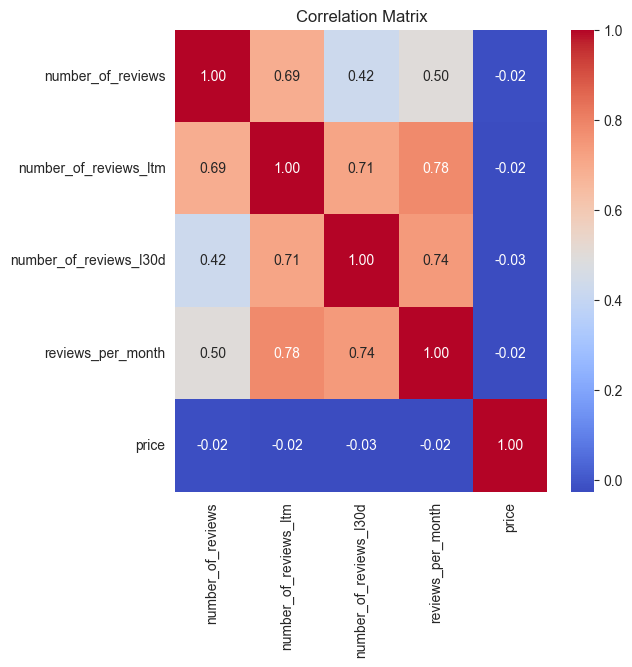

In [499]:
# number_of_reviews, number_of_reviews_ltm, number_of_reviews_l30d, reviews_per_month

num_rev = ["number_of_reviews", "number_of_reviews_ltm", "number_of_reviews_l30d", "reviews_per_month"]

num_review_price_corr = num_rev + ["price"]

num_correlation_matrix = df[num_review_price_corr].corr()
plt.figure(figsize=(6, 6)) 
sns.heatmap(num_correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

num_rev_del = num_rev[0:3]
delete_cols.extend(num_rev_del)

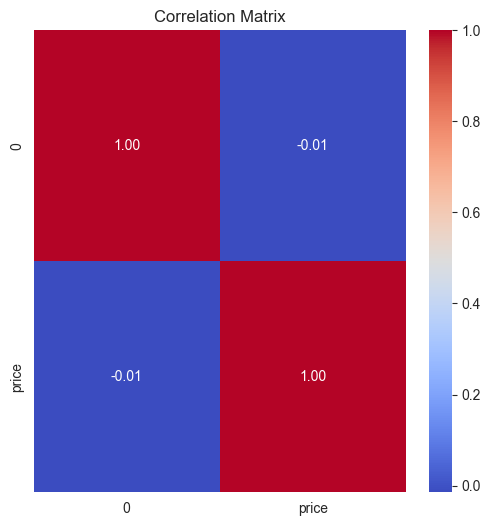

In [500]:
# Convert 'last_review' and 'first_review' columns to datetime
df['last_review'] = pd.to_datetime(df['last_review'])
df['first_review'] = pd.to_datetime(df['first_review'])

# Calculate the difference in days between last_review and first_review
df['days_between_reviews'] = (df['last_review'] - df['first_review']).dt.days


rev_per_day = df["number_of_reviews"]/df['days_between_reviews']

rev_per_day_corr = rev_per_day + df["price"]

rev_per_day_corr_matrix = pd.concat([rev_per_day, df["price"]], axis=1).corr()
plt.figure(figsize=(6, 6)) 
sns.heatmap(rev_per_day_corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#not statisticaly relevant -> delete
rev2 = ["days_between_reviews","last_review","first_review"]
delete_cols.extend(rev2)




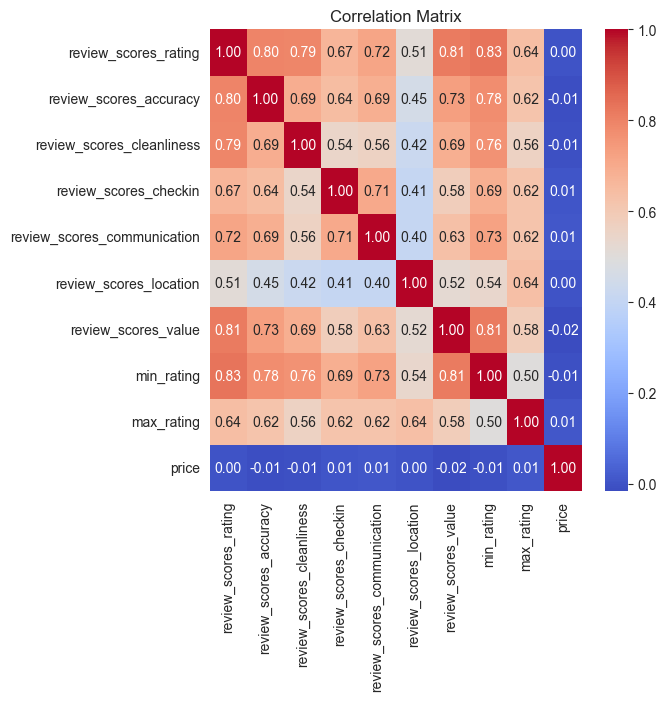

In [501]:
# review scores

review_cols = ["review_scores_rating",
               "review_scores_accuracy",
               "review_scores_cleanliness",
               "review_scores_checkin",
               "review_scores_communication",
               "review_scores_location",
               "review_scores_value"]

# Create a new column for the minimum value of review ratings for each row
df['min_rating'] = df[review_cols].min(axis=1)

# Create a new column for the maximum value of review ratings for each row
df['max_rating'] = df[review_cols].max(axis=1)

# checking for correlation between min + max and price
review_price_corr = review_cols + ['min_rating', 'max_rating'] + ["price"]

correlation_matrix = df[review_price_corr].corr()
plt.figure(figsize=(6, 6)) 
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#případně udělat ordered kategorie a rozdělit to fakt jen 1-2-3-4-5?

# keeping only min + max
delete_cols.extend(review_cols)

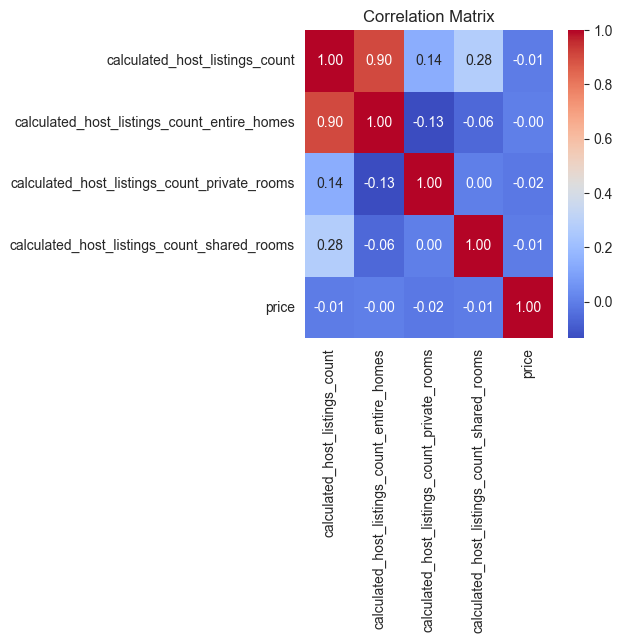

True     8034
False     332
Name: count, dtype: int64


In [502]:
# calculated_host_listings ...

calculated_host_cols = ["calculated_host_listings_count",
                        "calculated_host_listings_count_entire_homes",
                        "calculated_host_listings_count_private_rooms",
                        "calculated_host_listings_count_shared_rooms"]

corr_calc = calculated_host_cols + ["price"]

correlation_matrix = df[corr_calc].corr()
plt.figure(figsize=(4, 4)) 
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Check if the sum of the specified columns equals the 'calculated_host_listings_count' for each row
sum_check = (df['calculated_host_listings_count_entire_homes'] +
             df['calculated_host_listings_count_private_rooms'] +
             df['calculated_host_listings_count_shared_rooms']) == df['calculated_host_listings_count']

# Print True or False for each row
print(sum_check.value_counts())
# Why are the numbers not adding up?

# keeping only calculated_host_listings_count -- NEBO MOŽNÁ NEDROPNEM VŠECHNY? - moc nevidím přínos
#-> L:yes, dropla jsem všechny

delete_cols.extend(calculated_host_cols)


In [503]:
dfcl = df.drop(delete_cols, axis=1)

dfcl.shape


(8366, 33)

In [504]:
print(dfcl.describe())

        host_since  host_response_rate  host_acceptance_rate  \
count  8366.000000         7892.000000           8144.000000   
mean   2016.860507            0.967430              0.925747   
std       3.833040            0.141203              0.187359   
min    2008.000000            0.000000              0.000000   
25%    2014.000000            1.000000              0.970000   
50%    2016.000000            1.000000              1.000000   
75%    2020.000000            1.000000              1.000000   
max    2024.000000            1.000000              1.000000   

       host_listings_count     latitude    longitude  accommodates  \
count          8366.000000  8366.000000  8366.000000   8366.000000   
mean             24.002032    50.081326    14.430045      4.025341   
std              72.398500     0.016325     0.031447      2.559761   
min               0.000000    49.947830    14.271417      1.000000   
25%               2.000000    50.075481    14.418107      2.000000   
50%

In [505]:
dfcl.to_pickle("listing_clean.pck")

In [506]:
# price - getting rid of NaN rows

print(dfcl["price"].isnull().sum())

rows_with_nan_price = dfcl[dfcl['price'].isna()]
print(rows_with_nan_price.describe())


337
        host_since  host_response_rate  host_acceptance_rate  \
count   337.000000          314.000000            325.000000   
mean   2016.264095            0.972739              0.876585   
std       3.749403            0.127566              0.192372   
min    2008.000000            0.000000              0.000000   
25%    2013.000000            1.000000              0.790000   
50%    2016.000000            1.000000              0.990000   
75%    2019.000000            1.000000              1.000000   
max    2024.000000            1.000000              1.000000   

       host_listings_count    latitude   longitude  accommodates  bathrooms  \
count           337.000000  337.000000  337.000000    337.000000  15.000000   
mean             31.718101   50.079056   14.431686      3.611276   1.166667   
std             122.474636    0.012840    0.025296      2.309451   0.408248   
min               1.000000   50.034902   14.298939      1.000000   1.000000   
25%               4.0000

In [507]:
dfcl_cleaned = dfcl.dropna(subset=['price'])
print(dfcl_cleaned.describe())

        host_since  host_response_rate  host_acceptance_rate  \
count  8029.000000         7578.000000           7819.000000   
mean   2016.885540            0.967210              0.927790   
std       3.834711            0.141744              0.186881   
min    2008.000000            0.000000              0.000000   
25%    2014.000000            1.000000              0.970000   
50%    2016.000000            1.000000              1.000000   
75%    2020.000000            1.000000              1.000000   
max    2024.000000            1.000000              1.000000   

       host_listings_count     latitude    longitude  accommodates  \
count          8029.000000  8029.000000  8029.000000   8029.000000   
mean             23.678167    50.081421    14.429977      4.042720   
std              69.506577     0.016449     0.031678      2.568405   
min               0.000000    49.947830    14.271417      1.000000   
25%               2.000000    50.075797    14.417950      2.000000   
50%

In [508]:
# Distance to OLD TOWN SQUARE
city_center_lat = 50.0874654
city_center_lon = 14.4212535

def haversine(lat1, lon1, lat2, lon2):
    
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    
    # Haver's formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    
   
    r = 6378
    return c * r

#dfcl_cleaned['distance_from_city_centre'] = df.apply(lambda row: haversine(city_center_lat, city_center_lon, row['latitude'], row['longitude']), axis=1)

# Calculate distances
distances = haversine(city_center_lat, city_center_lon, dfcl_cleaned['latitude'], dfcl_cleaned['longitude'])

# Assign distances to a new column using .loc
dfcl_cleaned.loc[:, 'distance_from_city_centre'] = distances

# Print DataFrame with latitude, longitude, and distance_from_city_centre columns
print(dfcl_cleaned[['latitude', 'longitude', 'distance_from_city_centre']])



       latitude  longitude  distance_from_city_centre
0     50.082290  14.415520                   0.706834
1     50.088300  14.422720                   0.140007
2     50.087290  14.431790                   0.752803
3     50.088210  14.426230                   0.364970
4     50.082280  14.413450                   0.802408
...         ...        ...                        ...
8361  50.089833  14.418254                   0.339630
8362  50.074702  14.431016                   1.582668
8363  50.072252  14.393559                   2.604209
8364  50.081710  14.432030                   1.001478
8365  50.077946  14.426331                   1.119990

[8029 rows x 3 columns]


/var/folders/zh/ldm1m0cx0v9cw1816rqb1mgw0000gn/T/ipykernel_95234/1813554140.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfcl_cleaned.loc[:, 'distance_from_city_centre'] = distances


In [509]:
# Problem with lists in dataset

for column in dfcl_cleaned.columns:
    if isinstance(dfcl_cleaned[column].iloc[0], list):
        print(f"Column '{column}' contains lists as values.")

Column 'amenities_list' contains lists as values.


In [510]:
# drop amenities_list

dfcl_cleaned = dfcl_cleaned.drop("amenities_list", axis=1)

In [511]:
dfcl_cleaned.to_pickle("listing_clean_price.pck")